# IBM HR Analytics Employee Attrition & Performance

For Downloading Dataset (https://github.com/shubh2002/DataSets)

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

Education 
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('HR_Analytics.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

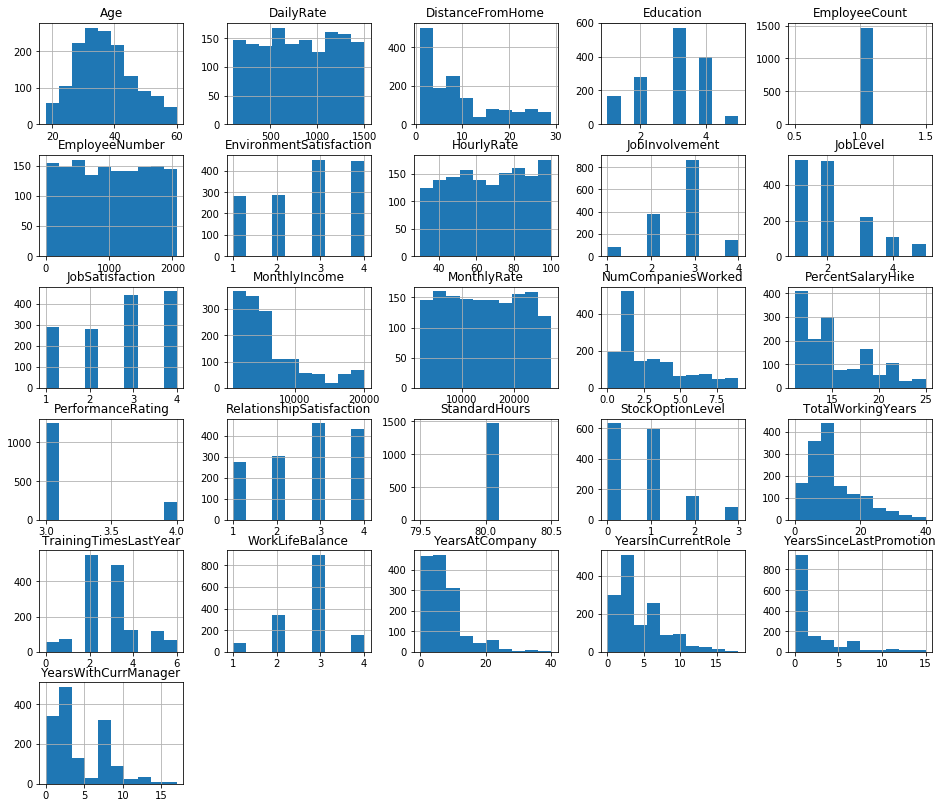

In [5]:
df.hist(figsize=(16,14))
plt.show()

In [6]:
"""We can see that employee count and StandardHours is constant value so we will remove that feature"""
df=df.drop(['StandardHours','EmployeeCount'],axis=1)

In [7]:
"""column name according to dtype"""
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [8]:
"""columns with object datatype"""
df_obj=df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]
df_obj.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [9]:
for i in df_obj.columns:
    print(df_obj[i].value_counts())
    print('\n')

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


Y    1470
Name: Over18, dtype: int64


No     1054
Yes   

In [10]:
"""Over18 is also constant feature so we will remove that feature"""
df=df.drop(['Over18'],axis=1)

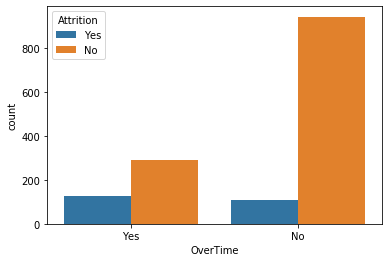

In [11]:
sns.countplot(x='OverTime',hue='Attrition',data=df)

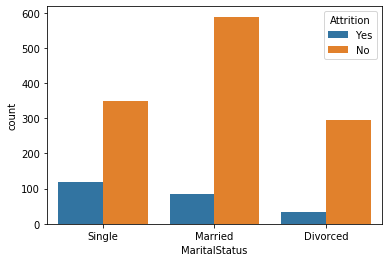

In [12]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

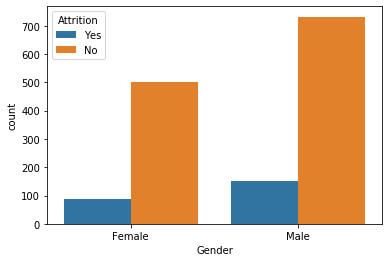

In [13]:
sns.countplot(x='Gender',hue='Attrition',data=df)

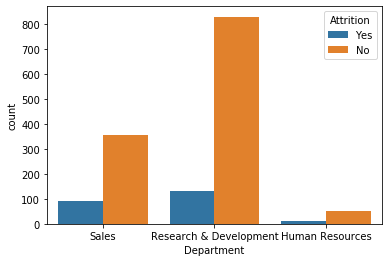

In [14]:
sns.countplot(x='Department',hue='Attrition',data=df)

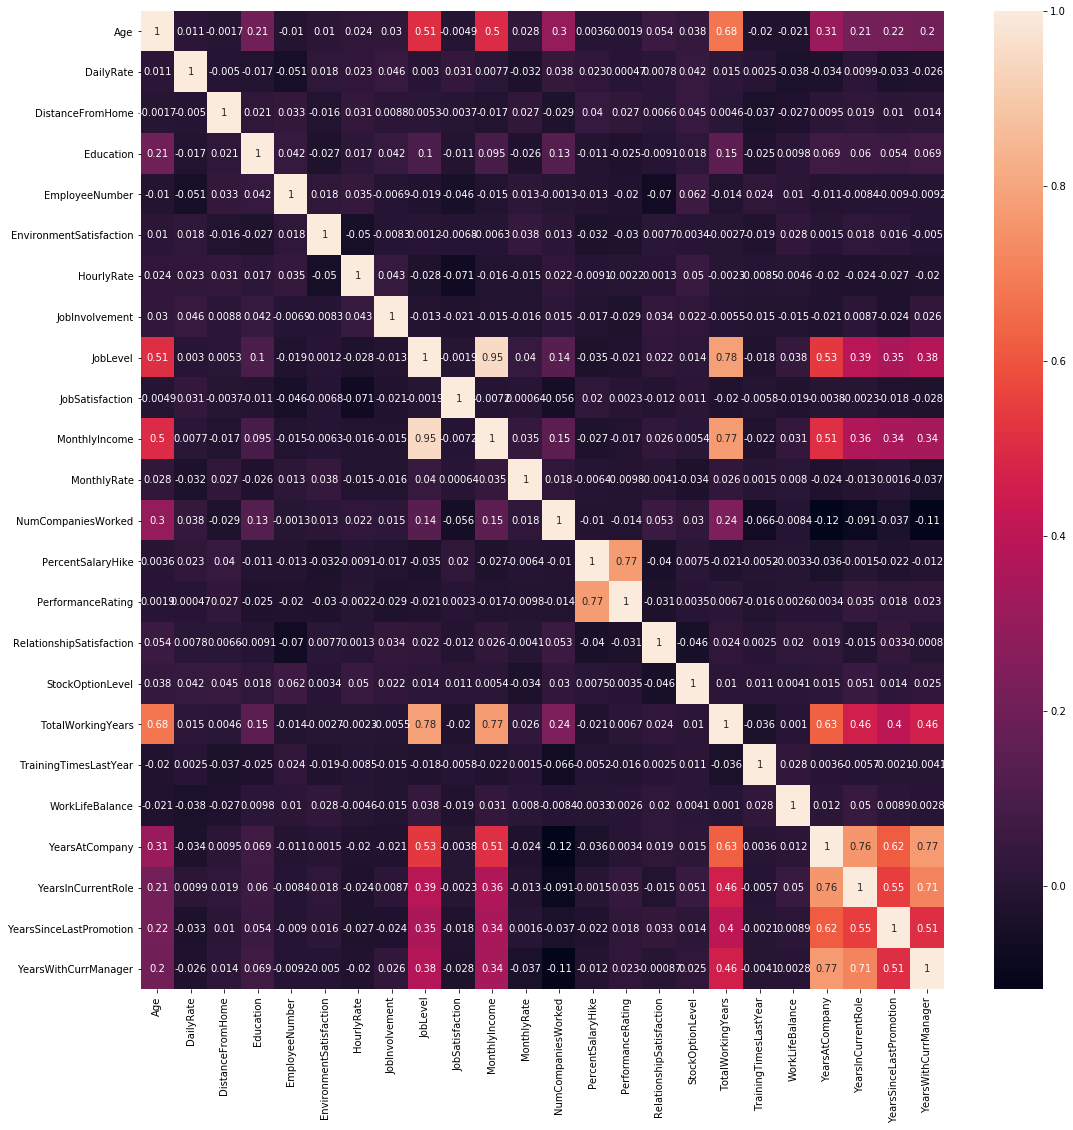

In [15]:
corr_heatmap=df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_heatmap,annot=True)
plt.show()

In [16]:
"""We can see that JobLevel and Education are highly correlated so we will remove one of the variable"""
df=df.drop(['JobLevel','EmployeeNumber'],axis=1)

In [17]:
df.shape

(1470, 30)

In [18]:
df=pd.get_dummies(df,drop_first=True)

In [19]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,5130,24907,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,3,2090,2396,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,2,3468,16632,...,1,0,0,0,0,0,0,1,0,0


In [20]:
print('Distance from home varies from {} to {}'.format(df.DistanceFromHome.min(),df.DistanceFromHome.max()))
print('Education varies from {} to {}'.format(df.Education.min(),df.Education.max()))
print('Age of empoyee varies from {} to {}'.format(df.Age.min(),df.Age.max()))
print('Income of employees varies from {} to {}'.format(df.MonthlyIncome.min(),df.MonthlyIncome.max()))

Distance from home varies from 1 to 29
Education varies from 1 to 5
Age of empoyee varies from 18 to 60
Income of employees varies from 1009 to 19999


In [21]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Sc

In [22]:
x=df.iloc[:,df.columns!='Attrition_Yes']
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       

In [23]:
"""Scaling the data"""
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler(feature_range=(0,5))
z=scaling.fit_transform(x)


In [24]:
y=df.iloc[:,df.columns=='Attrition_Yes']
y.shape

(1470, 1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=.25,random_state=45)
x_train

array([[1.78571429, 0.16105941, 0.53571429, ..., 5.        , 0.        ,
        0.        ],
       [1.54761905, 3.13886901, 0.        , ..., 5.        , 0.        ,
        0.        ],
       [0.23809524, 2.23693629, 1.42857143, ..., 0.        , 5.        ,
        0.        ],
       ...,
       [3.69047619, 3.87258411, 1.78571429, ..., 5.        , 0.        ,
        0.        ],
       [0.71428571, 4.817466  , 0.        , ..., 0.        , 5.        ,
        5.        ],
       [3.92857143, 4.66356478, 1.78571429, ..., 0.        , 5.        ,
        0.        ]])

In [26]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
acc1

0.875

In [27]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
acc2

0.6467391304347826

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
acc3

0.8396739130434783

In [29]:
from sklearn.svm import SVC
model4=SVC(kernel='linear')
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
acc4

0.8668478260869565

In [30]:
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
acc5

0.7961956521739131

In [31]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier(n_estimators=100,criterion='gini')
model6.fit(x_train,y_train)
y_pred=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred)
acc6

0.8288043478260869

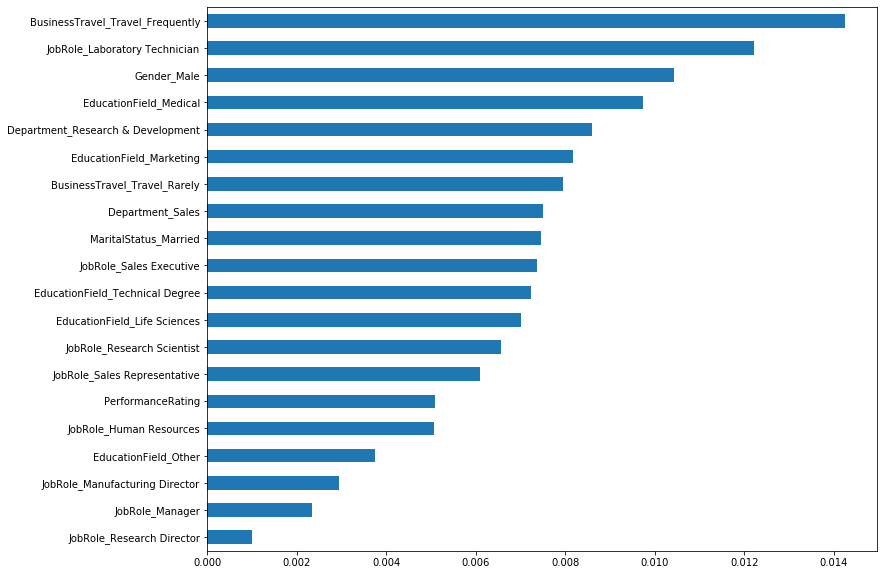

In [32]:
plt.figure(figsize=(12,10))
importance=pd.Series(model6.feature_importances_,index=x.columns)
importance=importance.sort_values(ascending=True).head(20)
importance.plot(kind='barh')

In [33]:
from xgboost import XGBClassifier
model7=XGBClassifier()
model7.fit(x_train,y_train)
y_pred=model7.predict(x_test)
acc7=accuracy_score(y_test,y_pred)
acc7

0.8369565217391305

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model8=GradientBoostingClassifier()
model8.fit(x_train,y_train)
y_pred=model8.predict(x_test)
acc8=accuracy_score(y_test,y_pred)
acc8

0.8478260869565217

In [35]:
from sklearn.ensemble import AdaBoostClassifier
model9=AdaBoostClassifier()
model9.fit(x_train,y_train)
y_pred=model9.predict(x_test)
acc9=accuracy_score(y_test,y_pred)
acc9

0.875

In [36]:
from sklearn.model_selection import cross_val_score
CV=[]
models=[model1,model2,model3,model4,model5,model6,model7,model8,model9]
for i in models:
    score=cross_val_score(i,x,y,cv=10,scoring='accuracy')
    score=score.mean()
    CV.append(score)
print(CV)

[0.8795793067319486, 0.7876941520777138, 0.8191027762456334, 0.8475964432422358, 0.7993326986477671, 0.855810773031908, 0.8694120595294763, 0.8653533460774165, 0.881694358602382]


In [37]:
result=pd.DataFrame({'MODELS':['LOGISTIC REGRESSION','NAIVE BAYES','K NEIGHBORS CLASSIFIER','SUPPORT VECTOR MACHINE',
                              'DECISION TREE','RANDOM FOREST','XGBOOST','GRADIENT BOOSTING','ADA BOOST'],
                    'ACCURACY SCORE':[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9],
                    'CROSS VAL SCORE':CV})
result.sort_values(by='ACCURACY SCORE',ascending=False)

,MODELS,ACCURACY SCORE,CROSS VAL SCORE
0,LOGISTIC REGRESSION,0.875000,0.879579
8,ADA BOOST,0.875000,0.881694
3,SUPPORT VECTOR MACHINE,0.866848,0.847596
7,GRADIENT BOOSTING,0.847826,0.865353
2,K NEIGHBORS CLASSIFIER,0.839674,0.819103
6,XGBOOST,0.836957,0.869412
5,RANDOM FOREST,0.828804,0.855811
4,DECISION TREE,0.796196,0.799333
1,NAIVE BAYES,0.646739,0.787694
